In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk import word_tokenize,pos_tag
import spacy
from collections import Counter

In [4]:



path = os.getcwd()
df = pd.read_csv(path+'\csv\champions.csv',sep=';')

Lore lens: [4016, 4332, 579, 437, 504, 472, 426, 433, 375, 515, 412, 515, 462, 546, 406, 518, 445, 357, 540, 472, 528, 516, 439, 418, 429, 407, 547, 411, 532, 499, 409, 345, 399, 469, 511, 447, 436, 421, 454, 515, 394, 471, 453, 452, 352, 462, 429, 445, 467, 536, 384, 407, 467, 389, 389, 423, 352, 416, 366, 522, 383, 393, 391, 379, 481, 439, 365, 446, 461, 437, 476, 461, 514, 585, 444, 458, 499, 529, 456, 486, 516, 498, 509, 378, 421, 414, 417, 428, 401, 440, 414, 477, 428, 440, 479, 439, 408, 483, 484, 539, 474, 358, 385, 453, 417, 418, 533, 369, 539, 485, 478, 356, 466, 549, 505, 335, 418, 526, 443, 496, 412, 398, 611, 471, 457, 480, 436, 422, 359, 456, 409, 414, 360, 474, 357, 506, 340, 496, 472, 397, 374, 482, 435, 448, 426, 530, 425, 501, 447, 468, 345, 421, 459, 352, 413, 438, 527]
Y: (157,)
X: (157,)


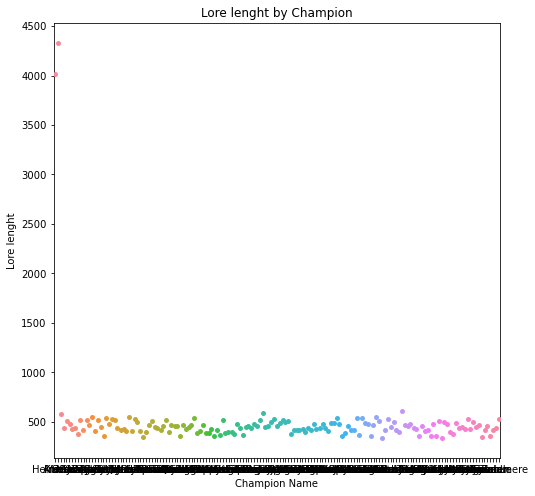

In [5]:
# Lore Lenght
lores = df[['lore']]
lore_lens = []

for i in range(0,157):
    lore = lores.iloc[i,0]
    lore_lens.append(len(lore))
print('Lore lens: ' + str(lore_lens))

y = np.array(lore_lens)
print('Y: ' + str(y.shape))

names = df[['name']]

x = np.array(names)
x = x.flatten()
print('X: ' + str(x.shape))

plt.figure(figsize=(8,8))
ax = sns.stripplot(x, y);
ax.set(xlabel ='Champion Name', ylabel ='Lore lenght')
plt.title('Lore lenght by Champion');
plt.show()

In [87]:
# NLTK Downloads
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\neves\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


'Buildings, airports, highways, bridges, etc.'

In [6]:
# NER



lores = df[['lore']]
nlp = spacy.load('en_core_web_sm')

names = []

for name in df['name']:
    names.append(name)
    

for champ_num in range(0,len(lores)):

    lore = lores.iloc[champ_num,0]

    sentence = lore

    doc = nlp(sentence)

    num_person = 0
    num_gpe = 0
    num_org = 0
    num_object = 0
    num_event = 0
    num_norp = 0

    #Retrieve Different labels
    labels = []
    saved_infos = []
    for ent in doc.ents:
        labels.append(ent.label_)
        if ent.text in saved_infos:
            continue
        if ent.label_ == 'PERSON' or ent.text in names:
        #if ent.text in names:
            try:
                #Error if does not exist
                error = df['lore_person_' + str(num_person)]
            except:
                df['lore_person_' + str(num_person)] = ""
            df.at[champ_num,'lore_person_' + str(num_person)]= ent.text
            num_person+=1
        elif ent.label_ == 'GPE' or ent.label_ == 'LOC':
            try:
                #Error if does not exist
                error = df['lore_gpe_' + str(num_gpe)]
            except:
                df['lore_gpe_' + str(num_gpe)] = ""
            df.at[champ_num,'lore_gpe_' + str(num_gpe)]= ent.text
            num_gpe+=1
        elif ent.label_ == 'ORG' or ent.label_ == 'FAC':
            try:
                #Error if does not exist
                error = df['lore_org_' + str(num_org)]
            except:
                df['lore_org_' + str(num_org)] = ""
            df.at[champ_num,'lore_org_' + str(num_org)]= ent.text
            num_org+=1
        elif ent.label_ == 'WORK_OF_ART':
            try:
                #Error if does not exist
                error = df['lore_object_' + str(num_object)]
            except:
                df['lore_object_' + str(num_object)] = ""
            df.at[champ_num,'lore_object_' + str(num_object)]= ent.text
            num_object+=1
        elif ent.label_ == 'EVENT':
            try:
                #Error if does not exist
                error = df['lore_event_' + str(num_event)]
            except:
                df['lore_event_' + str(num_event)] = ""
            df.at[champ_num,'lore_event_' + str(num_event)]= ent.text
            num_event+=1
        elif ent.label_ == 'NORP':
            try:
                #Error if does not exist
                error = df['lore_norp_' + str(num_norp)]
            except:
                df['lore_norp_' + str(num_norp)] = ""
            df.at[champ_num,'lore_norp_' + str(num_norp)]= ent.text
            num_norp+=1
        else:
            continue
        saved_infos.append(ent.text)
        #elif ent.label_ == 'TIME' or ent.label_ == 'DATE' or ent.label_ == 'LAW' or ent.label_ == 'CARDINAL' or ent.label_ == "ORDINAL":
            #ignore = 1
        #else:
            #print("////WARNING: " + ent.text + ' ' + ent.label_)
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)


#print(df['lore_person_0']) 
print(df.iloc[0:50,63:73]) 
Counter(labels)

            lore_person_0               lore_gpe_0  \
0                    Kled                    Noxus   
1                  Anivia                    Notai   
2                   Yuumi              Bandle City   
3                    Sona                            
4   Cecil B. Heimerdinger                 Piltover   
5                    Nami               Tidecaller   
6                 Demacia                            
7                   Yasuo                            
8                   Akali                            
9               Runeterra                     Zaun   
10              Seraphine                 Piltover   
11                Icathia                            
12                   Zyra                            
13                 Veigar              Bandle City   
14                   Gnar                            
15                   Void                  Shurima   
16                Caitlyn                 Piltover   
17                          

Counter({'ORG': 1, 'DATE': 1, 'PERSON': 1})

In [7]:
df.to_csv(path+'\csv\champions_by_row_ner.csv')